### Bar Charts Using Python Libraries

In [33]:
# loading libraries
import pandas as pd
import numpy
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#reading data 
data=pd.read_csv("data.csv")

In [35]:
print(data.shape)
data.head(3)

(286, 10)


,Class,Age,Menopause,Tumor_size,inv_nodes,nodes_caps,deg_mailig,breast,quad,irridant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       286 non-null    object
 1   Age         286 non-null    object
 2   Menopause   286 non-null    object
 3   Tumor_size  286 non-null    object
 4   inv_nodes   286 non-null    object
 5   nodes_caps  286 non-null    object
 6   deg_mailig  286 non-null    int64 
 7   breast      286 non-null    object
 8   quad        285 non-null    object
 9   irridant    286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
data.isna().sum()

Class         0
Age           0
Menopause     0
Tumor_size    0
inv_nodes     0
nodes_caps    0
deg_mailig    0
breast        0
quad          1
irridant      0
dtype: int64

In [9]:
data=data.dropna()

## Subplots

### All categorical variables taken into consideration and hue is given with binomial dependent variable. 

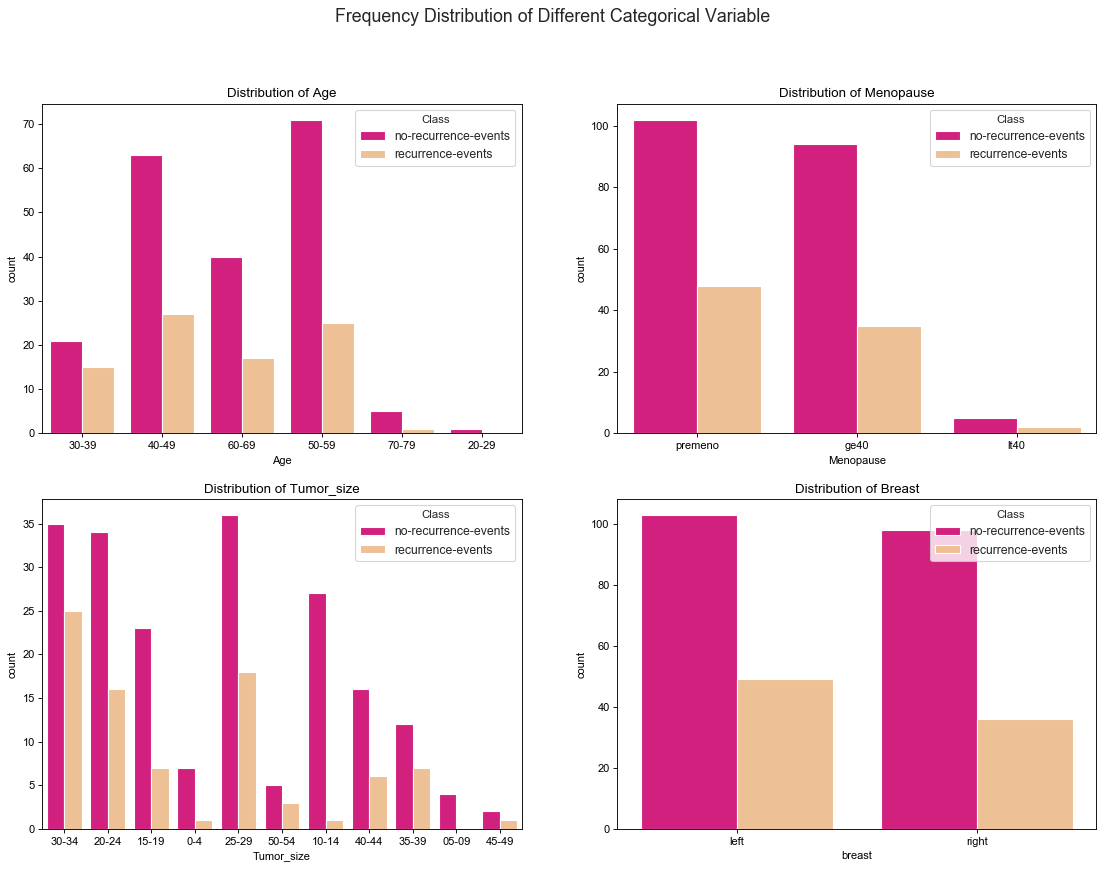

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='Age', hue = 'Class',data = data, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Distribution of Age')
sns.countplot(x='Menopause', hue = 'Class',data = data, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Distribution of Menopause')
sns.countplot(x='Tumor_size', hue = 'Class',data = data,ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Distribution of Tumor_size')
sns.countplot(x='breast', hue = 'Class',data = data, ax=axarr[1][1], palette="Accent_r")
axarr[1][1].set_title('Distribution of Breast')
fig.suptitle('Frequency Distribution of Different Categorical Variable', fontsize=16);

### Bar charts with different colors. From transparent to opaque.In  facecolor option, starting 3 representing RGB colors and 4th is alpha. If all are 0 then white colored transparentbars will appear, but changing these values will change the color too, but these values should be from 0 to 1. 

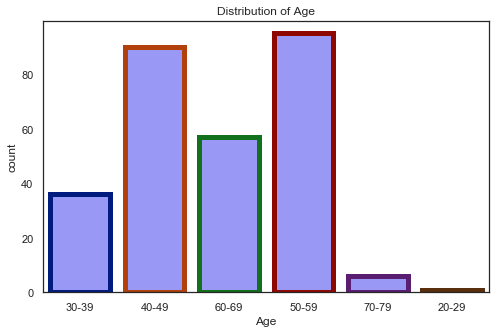

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="Age", data=data,
                   facecolor=(0,0,0.9, 0.4),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark",24)).set_title("Distribution of Age")

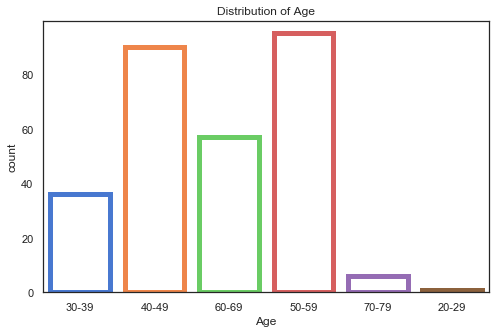

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="Age", data=data,
                   facecolor=(0,0,0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("muted",24)).set_title("Distribution of Age")

### Colors and widths can also be changed. Below are the codes.

In [38]:
dm=data["Age"].value_counts()
dq=pd.DataFrame({'Age':dm.index, 'Counts':dm.values})

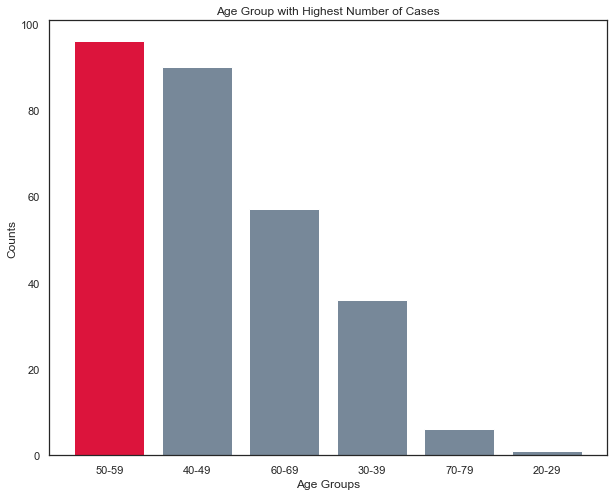

In [60]:
dm=data["Age"].value_counts()
dq=pd.DataFrame({'Age':dm.index, 'Counts':dm.values})
colors = ['lightslategray'] * 6
colors[0] = 'crimson'
plt.bar(dq.Age, dq.Counts, color=colors)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title('Age Group with Highest Number of Cases')
plt.show()

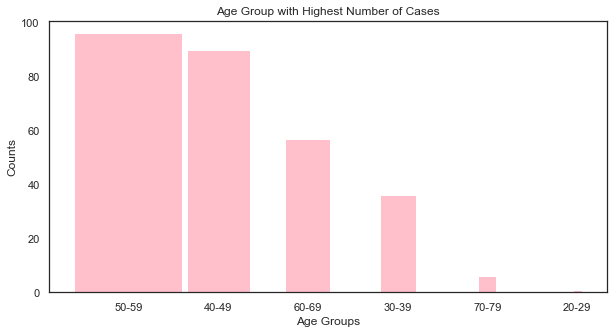

In [73]:
plt.rcParams["figure.figsize"] = (10, 5)
#colors = ['lightslategray'] * 6
#colors[0] = 'crimson'
plt.bar(dq.Age, dq.Counts, color='pink', width=[1.2,0.7,0.5,0.4,0.2,0.1])
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title('Age Group with Highest Number of Cases')
plt.show()

## Grouped Bar Chart

### After preparing data, grouped bar chart is plotted. Here it is indicating 50-59 years of women have more left lower quad breast tumors. After that 40-49 is more prevalent age. Similarly other inferences can be made from this chart.

Text(0.5, 1.0, 'Scores grouped by quad and age')

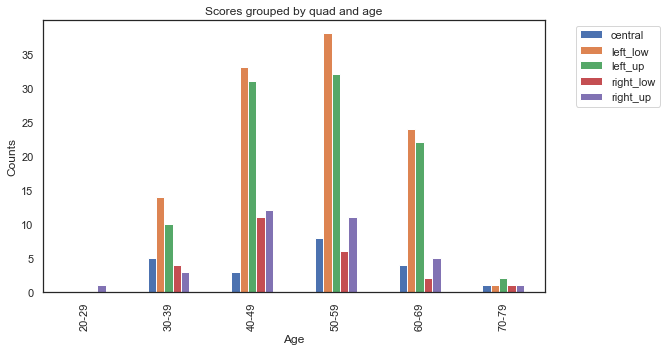

In [14]:
df2 = data.groupby(['Age', 'quad'])['Age'].count().unstack('quad').fillna(0) #data prep
plt.rcParams["figure.figsize"] = (9, 5)
df2[['central', 'left_low', 'left_up', 'right_low', 'right_up']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Counts')
plt.title('Scores grouped by quad and age')

## Stacked Bar Chart

### Same results that we got earlier are here in the stacked option. Though there are two options in stacked one is normalized stack bar chart and other as it is. 

Text(0.5, 1.0, 'Normalize stacked by quad and age')

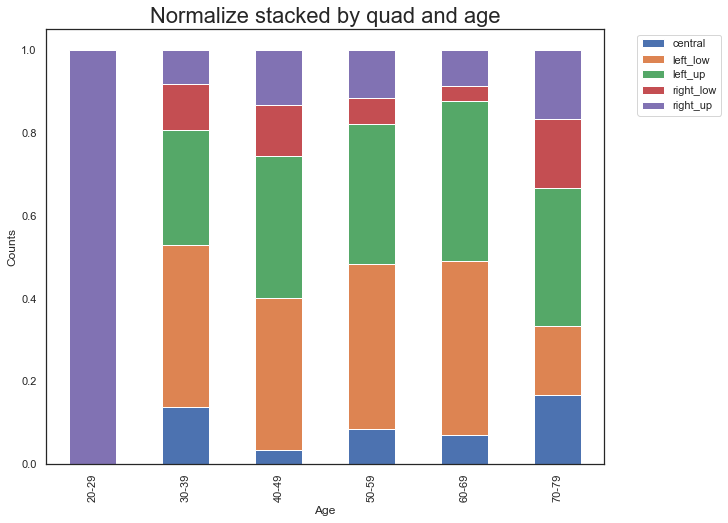

In [31]:
df2 = data.groupby('Age')['quad'].value_counts(normalize=True).unstack('quad').plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Counts')
plt.title('Normalize stacked by quad and age', fontsize=22)

Text(0.5, 1.0, 'Scores stacked by quad and age')

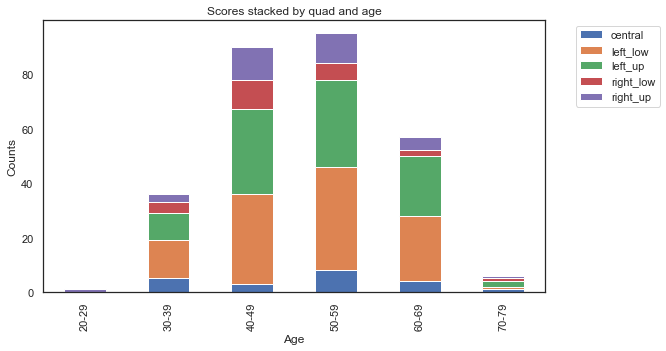

In [15]:
df2[['central', 'left_low', 'left_up', 'right_low', 'right_up']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Counts')
plt.title('Scores stacked by quad and age')


## Horizonatal Bar Chart

### For some new change new designs were made here.

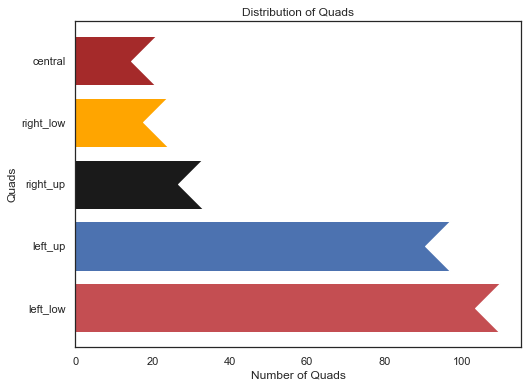

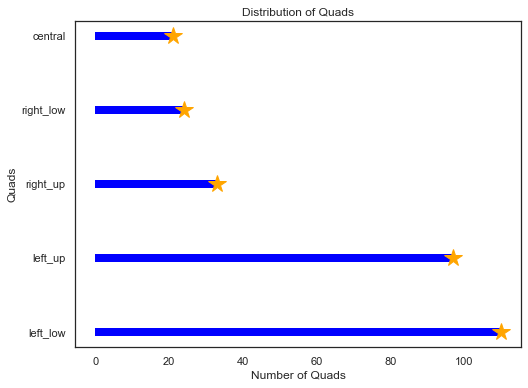

In [16]:
#data prep
b=data['quad'].value_counts()
d=pd.DataFrame({'quad':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
#plot
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,6))
colors=['r', 'b', 'k', 'orange', 'brown']
ax.plot(sort_df.Statistics, d.quad, "D", color='white', markersize=36)
ax.barh(sort_df.quad, width=sort_df.Statistics, color=colors)
plt.xlabel("Number of Quads")
plt.ylabel("Quads")
plt.title("Distribution of Quads");
#######################################################################
#Second plot
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sort_df.Statistics, d.quad, "*", color='orange', markersize=18)
ax.hlines(sort_df.quad, xmax=sort_df.Statistics,xmin=0,colors='blue', linewidth=8)
plt.xlabel("Number of Quads")
plt.ylabel("Quads")
plt.title("Distribution of Quads");

## Pyramid Population Chart

### This is very useful in comparing gender in population charts. As in the above data, there is no population, just for exploration below bar chart was plotted

Text(0.5, 0, 'Female/Male')

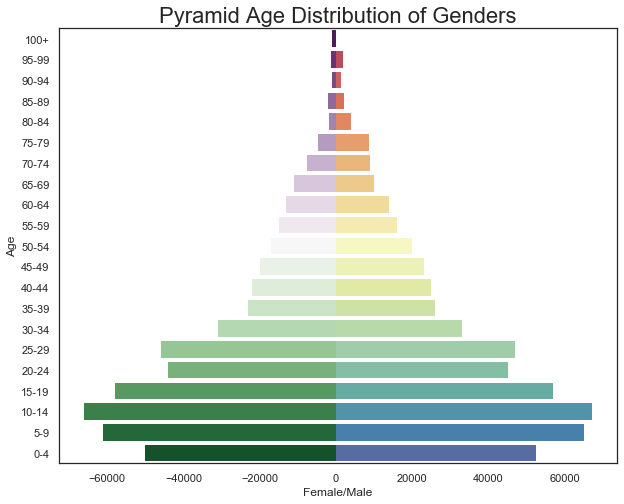

In [17]:
# Prepare Data
plt.rcParams["figure.figsize"] = (10, 8)
df = pd.DataFrame({'Age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'], 
                    'Male': [-50000, -61000, -66000, -58000, -44000, -46000, -31000, -23000, -22000, -20000, -17000, -15000, -13000, -11000, -7600, -4600, -1900, -2000, -1160, -1400, -1000], 
                    'Female': [52367, 65000, 67000, 57000, 45000, 47000, 33000, 26000, 25000, 23000, 20000, 16000, 14000, 10000, 9000, 8600, 3900, 2000, 1200, 1800, 0]})

#Class
AgeClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
#Chart
bar_plot = sns.barplot(x='Male', y='Age', data=df, order=AgeClass, lw=0, palette="PRGn")
bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeClass, lw=0, palette="Spectral")
plt.title("Pyramid Age Distribution of Genders", fontsize=22)
plt.xlabel("Female/Male")

### Similarly as pyramid bar chart, below chart is made. Just to see tumor size that are greater than 30

Text(0.5, 1.0, 'Comparison of Tumor size counts that are greater than 30')

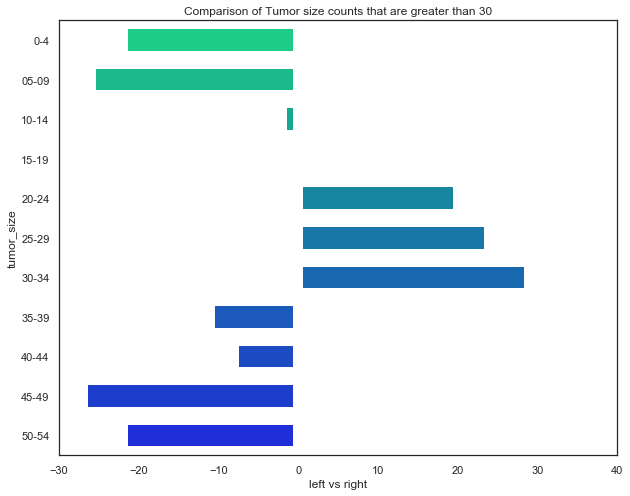

In [18]:
#data prep
df3 = data.groupby(['Tumor_size'])['Tumor_size'].count()
df4=pd.DataFrame({'tumor_size':df3.index, 'Counts':df3.values})
df4['Count']=df4['Counts']+(-30)
#plot
Class=['0-4', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
sns.barplot(x='Count', y='tumor_size', data=df4, order=Class, lw=10, palette='winter_r')
plt.xlim([-30, 40])
plt.xlabel('left vs right')
plt.title("Comparison of Tumor size counts that are greater than 30")

In [19]:
df3 = data.groupby(['Tumor_size', 'breast'])['Tumor_size'].count().unstack('breast').fillna(0)
df3
df3=df3.reset_index()
df3['left']=df3['left']*(-1)
df4=df3.sort_values("right")
df4

breast,Tumor_size,left,right
1,05-09,-3,1
9,45-49,-2,1
0,0-4,-4,4
10,50-54,-2,6
7,35-39,-10,9
2,10-14,-16,12
8,40-44,-10,12
3,15-19,-15,15
4,20-24,-26,24
5,25-29,-29,25


### Again similar graph is plotted and vertical line showing 0 value.

Text(0.5, 1.0, 'Tumor size and left/right breast distribution')

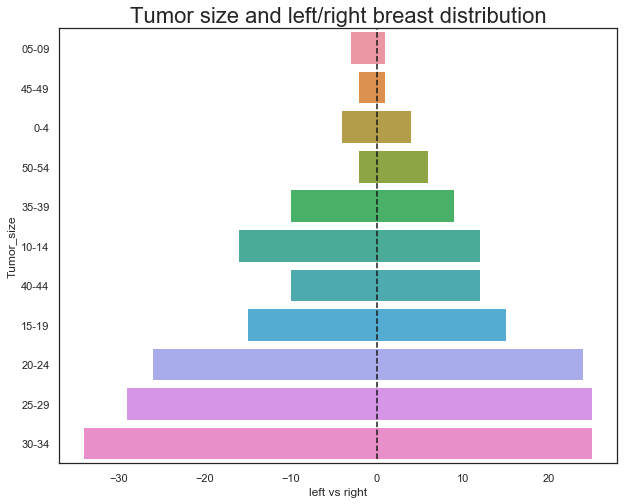

In [22]:
Class=['05-09','45-49','0-4', '50-54', '35-39', '10-14', '40-44', '15-19', '20-24', '25-29', '30-34']
bar_plot1 = sns.barplot(x='left', y='Tumor_size', data=df4, order=Class, lw=0)
bar_plot2 = sns.barplot(x='right', y='Tumor_size', data=df4, order=Class, lw=0)
plt.axvline(0,0.01, color='k', ls="--")
plt.xlabel('left vs right')
plt.title('Tumor size and left/right breast distribution', fontsize=22)

### Different bar charts were explored. As per condition and requirement, one should choose which plot would be better to represent data.